In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from utils import percentile

import warnings
warnings.filterwarnings("ignore")

In [2]:
sample_data_day = pd.read_csv('models_sku_store/sample_data_day.csv')
price_data_day = pd.read_csv('models_sku_store/sample_data_day_p.csv')
price_data_day.rename(columns={'SampleSize': 'Num_diff_prices'}, inplace=True)
sample_data_day

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset
0,5606,2834,1.173111,2.316427e-01,1.590257e-01,log-log,1.173111,2.0,9,10,SKU|Store,SKU|Store|Day
1,5606,2834,1.114628,1.382282e-01,1.065026e-01,log-log,1.114628,6.0,18,20,SKU|Store,SKU|Store|Day
2,5606,2834,0.528576,4.509032e-02,2.599342e-01,log-log,0.528576,6.0,25,30,SKU|Store,SKU|Store|Day
3,5606,2834,0.399299,2.042320e-02,3.790178e-01,log-log,0.399299,12.0,31,40,SKU|Store,SKU|Store|Day
4,5606,2834,0.002598,8.148037e-07,9.950361e-01,log-log,0.002598,15.0,35,50,SKU|Store,SKU|Store|Day
...,...,...,...,...,...,...,...,...,...,...,...,...
730722,211503,1111,-0.566334,2.944716e-02,1.151780e-04,log-log,-0.566334,45.0,13,500,SKU|Store,SKU|Store|Day
730723,211503,1111,-0.574718,3.117594e-02,1.360151e-05,log-log,-0.574718,52.0,14,600,SKU|Store,SKU|Store|Day
730724,211503,1111,-0.580943,3.049713e-02,3.353429e-06,log-log,-0.580943,64.0,14,700,SKU|Store,SKU|Store|Day
730725,211503,1111,-0.611979,3.518078e-02,9.073871e-08,log-log,-0.611979,70.0,14,800,SKU|Store,SKU|Store|Day


In [3]:
sample_data_week = pd.read_csv('models_sku_store/sample_data_week.csv')
price_data_week = pd.read_csv('models_sku_store/sample_data_week_p.csv')
price_data_week.rename(columns={'SampleSize': 'Num_diff_prices'}, inplace=True)
sample_data_week

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset
0,10220,2834,-6.467575,0.315375,0.091158,log-log,-6.467575,7.857143,8,10,SKU|Store,SKU|Store|Week
1,10220,2834,1.663427,0.017660,0.576489,log-log,1.663427,16.285714,11,20,SKU|Store,SKU|Store|Week
2,10220,2834,2.758622,0.055194,0.211415,log-log,2.758622,18.285714,12,30,SKU|Store,SKU|Store|Week
3,10220,2834,3.506491,0.083252,0.070981,log-log,3.506491,25.000000,13,40,SKU|Store,SKU|Store|Week
4,10220,2834,2.223723,0.035826,0.188012,log-log,2.223723,32.428571,15,50,SKU|Store,SKU|Store|Week
...,...,...,...,...,...,...,...,...,...,...,...,...
632697,146728,1099,-2.383424,0.051501,0.023174,log-log,-2.383424,134.152381,50,100,SKU|Store,SKU|Store|Week
632698,146728,1099,-1.977179,0.037591,0.042402,log-log,-1.977179,148.842857,53,110,SKU|Store,SKU|Store|Week
632699,146728,1099,-1.985818,0.037278,0.034616,log-log,-1.985818,155.152381,55,120,SKU|Store,SKU|Store|Week
632700,146728,1099,-1.755337,0.028907,0.053124,log-log,-1.755337,164.323810,55,130,SKU|Store,SKU|Store|Week


# Подсчет адекватных значений

In [4]:
#адекватные значения
min_elast, max_elast = -10, 0
p_value = 0.05

In [5]:
#считаем адекватные значения для SKU_id|Day
sample_data_day['flag_AE'] = ((sample_data_day.loc[:, 'Elasticity'] > min_elast) & 
                             (sample_data_day.loc[:, 'Elasticity'] < max_elast )).astype(int)
sample_data_day['flag_R&AE'] = ((sample_data_day['flag_AE']) &
                                               (sample_data_day.loc[:, 'T-test-p-value'] < p_value)).astype(int)

price_data_day['flag_AE'] = ((price_data_day.loc[:, 'Elasticity'] > min_elast) & 
                             (price_data_day.loc[:, 'Elasticity'] < max_elast )).astype(int)
price_data_day['flag_R&AE'] = ((price_data_day['flag_AE']) &
                                               (price_data_day.loc[:, 'T-test-p-value'] < p_value)).astype(int)

In [6]:
#считаем адекватные значения для SKU_id|Week
sample_data_week['flag_AE'] = ((sample_data_week.loc[:, 'Elasticity'] > min_elast) & 
                             (sample_data_week.loc[:, 'Elasticity'] < max_elast )).astype(int)
sample_data_week['flag_R&AE'] = ((sample_data_week['flag_AE']) &
                                               (sample_data_week.loc[:, 'T-test-p-value'] < p_value)).astype(int)

price_data_week['flag_AE'] = ((price_data_week.loc[:, 'Elasticity'] > min_elast) & 
                             (price_data_week.loc[:, 'Elasticity'] < max_elast )).astype(int)
price_data_week['flag_R&AE'] = ((price_data_week['flag_AE']) &
                                               (price_data_week.loc[:, 'T-test-p-value'] < p_value)).astype(int)

In [7]:
#для подсчета средневзвешенного значения по qty
sample_data_day['QTY_AE_day'] = sample_data_day['Qty'] * sample_data_day['flag_AE']
sample_data_day['QTY_R&AE_day'] = sample_data_day['Qty'] * sample_data_day['flag_R&AE']

price_data_day['QTY_AE_day'] = price_data_day['Qty'] * price_data_day['flag_AE']
price_data_day['QTY_R&AE_day'] = price_data_day['Qty'] * price_data_day['flag_R&AE']

In [8]:
sample_data_day

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset,flag_AE,flag_R&AE,QTY_AE_day,QTY_R&AE_day
0,5606,2834,1.173111,2.316427e-01,1.590257e-01,log-log,1.173111,2.0,9,10,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
1,5606,2834,1.114628,1.382282e-01,1.065026e-01,log-log,1.114628,6.0,18,20,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
2,5606,2834,0.528576,4.509032e-02,2.599342e-01,log-log,0.528576,6.0,25,30,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
3,5606,2834,0.399299,2.042320e-02,3.790178e-01,log-log,0.399299,12.0,31,40,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
4,5606,2834,0.002598,8.148037e-07,9.950361e-01,log-log,0.002598,15.0,35,50,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730722,211503,1111,-0.566334,2.944716e-02,1.151780e-04,log-log,-0.566334,45.0,13,500,SKU|Store,SKU|Store|Day,1,1,45.0,45.0
730723,211503,1111,-0.574718,3.117594e-02,1.360151e-05,log-log,-0.574718,52.0,14,600,SKU|Store,SKU|Store|Day,1,1,52.0,52.0
730724,211503,1111,-0.580943,3.049713e-02,3.353429e-06,log-log,-0.580943,64.0,14,700,SKU|Store,SKU|Store|Day,1,1,64.0,64.0
730725,211503,1111,-0.611979,3.518078e-02,9.073871e-08,log-log,-0.611979,70.0,14,800,SKU|Store,SKU|Store|Day,1,1,70.0,70.0


In [9]:
#для подсчета средневзвешенного значения по qty
sample_data_week['QTY_AE_week'] = sample_data_week['Qty'] * sample_data_week['flag_AE']
sample_data_week['QTY_R&AE_week'] = sample_data_week['Qty'] * sample_data_week['flag_R&AE']

price_data_week['QTY_AE_week'] = price_data_week['Qty'] * price_data_week['flag_AE']
price_data_week['QTY_R&AE_week'] = price_data_week['Qty'] * price_data_week['flag_R&AE']

In [10]:
sample_data_week

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset,flag_AE,flag_R&AE,QTY_AE_week,QTY_R&AE_week
0,10220,2834,-6.467575,0.315375,0.091158,log-log,-6.467575,7.857143,8,10,SKU|Store,SKU|Store|Week,1,0,7.857143,0.000000
1,10220,2834,1.663427,0.017660,0.576489,log-log,1.663427,16.285714,11,20,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
2,10220,2834,2.758622,0.055194,0.211415,log-log,2.758622,18.285714,12,30,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
3,10220,2834,3.506491,0.083252,0.070981,log-log,3.506491,25.000000,13,40,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
4,10220,2834,2.223723,0.035826,0.188012,log-log,2.223723,32.428571,15,50,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632697,146728,1099,-2.383424,0.051501,0.023174,log-log,-2.383424,134.152381,50,100,SKU|Store,SKU|Store|Week,1,1,134.152381,134.152381
632698,146728,1099,-1.977179,0.037591,0.042402,log-log,-1.977179,148.842857,53,110,SKU|Store,SKU|Store|Week,1,1,148.842857,148.842857
632699,146728,1099,-1.985818,0.037278,0.034616,log-log,-1.985818,155.152381,55,120,SKU|Store,SKU|Store|Week,1,1,155.152381,155.152381
632700,146728,1099,-1.755337,0.028907,0.053124,log-log,-1.755337,164.323810,55,130,SKU|Store,SKU|Store|Week,1,0,164.323810,0.000000


## lim elas

In [11]:
lim_elast = sample_data_day[['Elasticity', 'SKU', 'Store']][sample_data_day['SampleSize'] == 1000]
lim_elast.rename(columns={'Elasticity' : 'lim_elas'}, inplace=True)
lim_elast

,lim_elas,SKU,Store
18,0.692407,5606,2834
37,2.281366,13316,2834
56,1.407704,3414,2834
75,-0.063538,4404,2834
94,0.871210,1823,2834
...,...,...,...
730641,-0.211640,145864,1136
730651,-0.071177,146047,1111
730670,-0.574656,325632,1108
730689,-0.135678,145864,1084


In [12]:
sample_data_day_lim = sample_data_day.merge(lim_elast, how='outer', left_on=['SKU', 'Store'], right_on=['SKU', 'Store'])
sample_data_day_lim.dropna(inplace=True)

In [13]:
sample_data_day_lim['diff_elas'] = abs(sample_data_day_lim['Elasticity'] - sample_data_day_lim['lim_elas'])
sample_data_day_lim['rel_diff_elas'] = abs(sample_data_day_lim['Elasticity'] - sample_data_day_lim['lim_elas']) / abs(sample_data_day_lim['lim_elas'])

In [14]:
lim_elas = sample_data_day_lim[['SampleSize', 'diff_elas', 'rel_diff_elas']].groupby('SampleSize').agg({'median', percentile(25), percentile(75)})
lim_elas

diff_elas                     rel_diff_elas                    
              pctl75    median    pctl25        pctl75    median    pctl25
SampleSize                                                                
10          1.496065  0.702945  0.299848      2.776163  1.140657  0.464446
20          0.785257  0.379559  0.157941      1.631501  0.715712  0.303579
30          0.605893  0.285583  0.117879      1.316558  0.592302  0.258278
40          0.498001  0.234089  0.094823      1.125652  0.518441  0.223948
50          0.435960  0.201426  0.081991      1.006884  0.467110  0.199808
60          0.397164  0.182335  0.073773      0.930672  0.432200  0.187162
70          0.357727  0.164839  0.065501      0.854902  0.400462  0.174246
80          0.326598  0.149581  0.060219      0.802375  0.371275  0.160071
90          0.303717  0.138992  0.055740      0.765959  0.353103  0.151261
100         0.285174  0.129913  0.052264      0.721330  0.334094  0.142368
200         0.182993  0.083444  0.032530      0.504361  0.230454  0.098287
300         0.142653  0.063201  0.024070      0.397239  0.180934  0.076950
400         0.113155  0.050395  0.019058      0.323236  0.147600  0.062778
500         0.091536  0.040564  0.015321      0.268538  0.119870  0.050770
600         0.075706  0.033223  0.012418      0.220806  0.098999  0.042290
700         0.059033  0.025884  0.009557      0.172828  0.078018  0.033578
800         0.043669  0.019036  0.007103      0.131866  0.057728  0.024425
900         0.028989  0.012644  0.004661      0.090053  0.039165  0.016161
1000        0.000000  0.000000  0.000000      0.000000  0.000000  0.000000

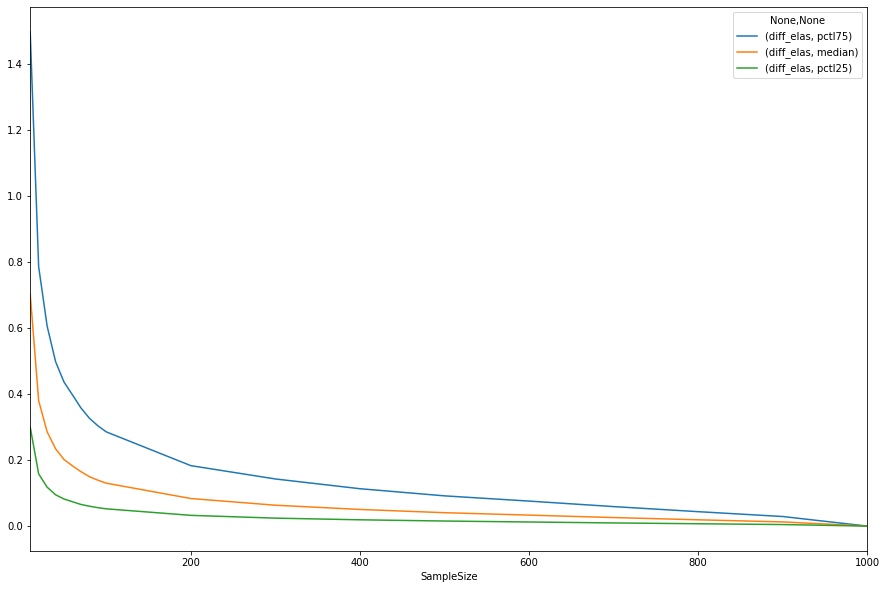

In [15]:
lim_elas.reset_index(inplace=True)
lim_elas[['SampleSize', 'diff_elas']].plot(figsize=(15, 10), x='SampleSize', y=['diff_elas', 'rel_diff_elas'])

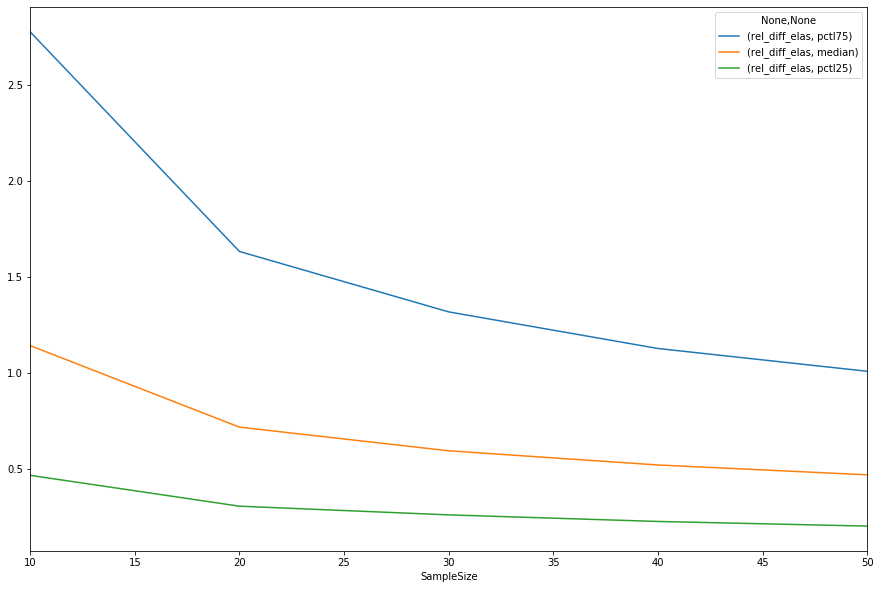

In [16]:
lim_elas[['SampleSize', 'rel_diff_elas']].tail(412).head(5).plot(figsize=(15, 10), x='SampleSize', y=['diff_elas', 'rel_diff_elas'])

## Зависимость свойств PED модели от количества различных значений цен

### Day

In [17]:
adeq_day_prices = price_data_day.groupby('Num_diff_prices').agg({'mean', 'count'})

adeq_day_prices.reset_index(inplace=True)
# adeq_day_prices = adeq_day_prices[adeq_day_prices['SampleSize'] == 408]
# adeq_day_prices = adeq_day_prices[adeq_day_prices[('SKU', 'count')] > 1000]

adeq_day_prices.rename(columns={'flag_AE' : '%#_AE_day',
                          'flag_R&AE' : '%#_R&AE_day'}, level=0 , inplace=True)
#для подсчета ср. взвеш.
adeq_day_prices['%QTY_AE_day'] = adeq_day_prices[('QTY_AE_day', 'mean')] / adeq_day_prices[('Qty', 'mean')]
adeq_day_prices['%QTY_R&AE_day'] = adeq_day_prices[('QTY_R&AE_day', 'mean')] / adeq_day_prices[('Qty', 'mean')]

In [18]:
adeq_day_prices

Num_diff_prices            SKU               Store        Coefficient  \
                              mean  count         mean  count        mean   
0                 1   68964.943949  38608  1188.242230  38608    4.768254   
1                 2   68751.713243  40128  1197.547897  40128   -1.049518   
2                 3   68679.805895  40612  1201.102113  40612   -0.922662   
3                 4   68658.732453  40819  1202.673216  40819   -0.852025   
4                 5   68563.157906  40904  1203.957021  40904   -0.827412   
..              ...            ...    ...          ...    ...         ...   
403             404  102237.000000      2  2834.000000      2   -0.848787   
404             405  102237.000000      2  2834.000000      2   -0.847973   
405             406  102237.000000      2  2834.000000      2   -0.848214   
406             407  102237.000000      2  2834.000000      2   -0.848468   
407             408  102237.000000      2  2834.000000      2   -0.850021   

           R-squared        T-test-p-value  ... %#_AE_day        %#_R&AE_day  \
     count      mean  count           mean  ...      mean  count        mean   
0    38608  0.004880  38608       0.046890  ...  0.009998  38608    0.001269   
1    40128  0.055902  40128       0.162668  ...  0.710227  40128    0.462420   
2    40612  0.054971  40612       0.129220  ...  0.824141  40612    0.606225   
3    40819  0.054564  40819       0.108543  ...  0.865185  40819    0.672701   
4    40904  0.054502  40904       0.099980  ...  0.884657  40904    0.706239   
..     ...       ...    ...            ...  ...       ...    ...         ...   
403      2  0.025809      2       0.338663  ...  1.000000      2    0.500000   
404      2  0.025684      2       0.339103  ...  1.000000      2    0.500000   
405      2  0.025685      2       0.339476  ...  1.000000      2    0.500000   
406      2  0.025687      2       0.339827  ...  1.000000      2    0.500000   
407      2  0.026012      2       0.343449  ...  1.000000      2    0.500000   

             QTY_AE_day        QTY_R&AE_day        %QTY_AE_day %QTY_R&AE_day  
     count         mean  count         mean  count                            
0    38608     2.490679  38608     0.175016  38608    0.014158      0.000995  
1    40128   169.008300  40128   135.367490  40128    0.688508      0.551462  
2    40612   242.530550  40612   211.491624  40612    0.825429      0.719791  
3    40819   289.348457  40819   263.801518  40819    0.873831      0.796679  
4    40904   322.566689  40904   298.908632  40904    0.896863      0.831084  
..     ...          ...    ...          ...    ...         ...           ...  
403      2  1291.000000      2   568.000000      2    1.000000      0.439969  
404      2  1293.000000      2   570.000000      2    1.000000      0.440835  
405      2  1293.000000      2   570.000000      2    1.000000      0.440835  
406      2  1293.000000      2   570.000000      2    1.000000      0.440835  
407      2  1293.500000      2   570.000000      2    1.000000      0.440665  

[408 rows x 25 columns]

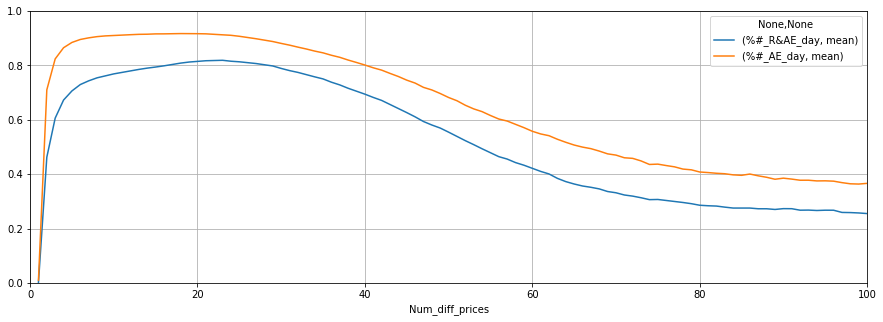

In [19]:
adeq_day_prices[[('%#_R&AE_day', 'mean'), ('%#_AE_day', 'mean'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', ylim=[0, 1], xlim=[0.0, 100], grid=True)

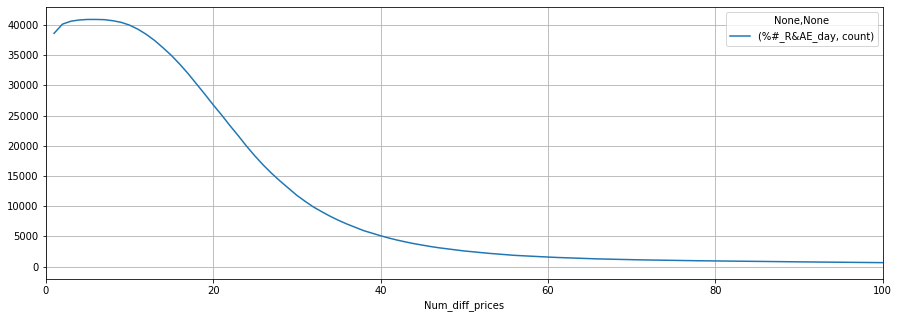

In [20]:
adeq_day_prices[[('%#_R&AE_day', 'count'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', xlim=[0.0, 100], grid=True)

### Week

In [21]:
adeq_week_prices = price_data_week.groupby('Num_diff_prices').agg({'mean', 'count'})

adeq_week_prices.reset_index(inplace=True)
# adeq_week_prices = adeq_week_prices[adeq_week_prices['SampleSize'] == 150]
# adeq_week_prices = adeq_week_prices[adeq_week_prices[('SKU', 'count')] > 0]

adeq_week_prices.rename(columns={'flag_AE' : '%#_AE_week',
                          'flag_R&AE' : '%#_R&AE_week'}, level=0 , inplace=True)
#для подсчета ср. взвеш.
adeq_week_prices['%QTY_AE_week'] = adeq_week_prices[('QTY_AE_week', 'mean')] / adeq_week_prices[('Qty', 'mean')]
adeq_week_prices['%QTY_R&AE_week'] = adeq_week_prices[('QTY_R&AE_week', 'mean')] / adeq_week_prices[('Qty', 'mean')]

In [22]:
adeq_week_prices

Num_diff_prices           SKU               Store          Coefficient  \
                             mean  count         mean  count          mean   
0                 1  68487.217352  40630  1180.016072  40630  3.183712e+06   
1                 2  68572.392676  41864  1186.003487  41864 -1.207533e+00   
2                 3  68586.575618  42186  1188.406130  42186 -9.266576e-01   
3                 4  68599.905781  42327  1189.674085  42327 -8.746406e-01   
4                 5  68584.390297  42378  1190.163552  42378 -8.447405e-01   
..              ...           ...    ...          ...    ...           ...   
131             132  53365.714286      7  2587.428571      7 -1.651404e-01   
132             133  61031.500000      4  2834.000000      4 -4.924936e-01   
133             134  61031.500000      4  2834.000000      4 -4.987864e-01   
134             135  75554.666667      3  2834.000000      3 -7.529292e-01   
135             136  10430.000000      1  2834.000000      1  1.089935e+00   

           R-squared        T-test-p-value  ... %#_AE_week         \
     count      mean  count           mean  ...       mean  count   
0    40630      -inf  40630   1.931377e-01  ...   0.030544  40630   
1    41864  0.150293  41864   1.946745e-01  ...   0.706789  41864   
2    42186  0.152542  42186   1.567724e-01  ...   0.819822  42186   
3    42327  0.154001  42327   1.333903e-01  ...   0.862641  42327   
4    42378  0.154090  42378   1.218262e-01  ...   0.883595  42378   
..     ...       ...    ...            ...  ...        ...    ...   
131      7  0.041499      7   2.189504e-01  ...   0.428571      7   
132      4  0.064600      4   1.121042e-01  ...   0.500000      4   
133      4  0.063334      4   1.259499e-01  ...   0.500000      4   
134      3  0.086619      3   1.064523e-02  ...   0.666667      3   
135      1  0.146150      1   8.442344e-07  ...   0.000000      1   

    %#_R&AE_week        QTY_AE_week        QTY_R&AE_week        %QTY_AE_week  \
            mean  count        mean  count          mean  count                
0       0.000468  40630    0.796675  40630      0.006704  40630     0.036956   
1       0.412407  41864   21.433484  41864     15.259690  41864     0.696914   
2       0.551771  42186   30.466691  42186     24.606193  42186     0.820262   
3       0.619817  42327   36.569672  42327     31.453738  42327     0.870326   
4       0.656496  42378   40.947507  42378     35.997647  42378     0.892671   
..           ...    ...         ...    ...           ...    ...          ...   
131     0.142857      7  113.063918      7     24.554422      7     0.671602   
132     0.250000      4   84.767857      4     44.041667      4     0.700079   
133     0.250000      4   85.267857      4     44.327381      4     0.699668   
134     0.666667      3  113.690476      3    113.690476      3     0.764816   
135     0.000000      1    0.000000      1      0.000000      1     0.000000   

    %QTY_R&AE_week  
                    
0         0.000311  
1         0.496172  
2         0.662478  
3         0.748571  
4         0.784762  
..             ...  
131       0.145854  
132       0.363730  
133       0.363730  
134       0.764816  
135       0.000000  

[136 rows x 25 columns]

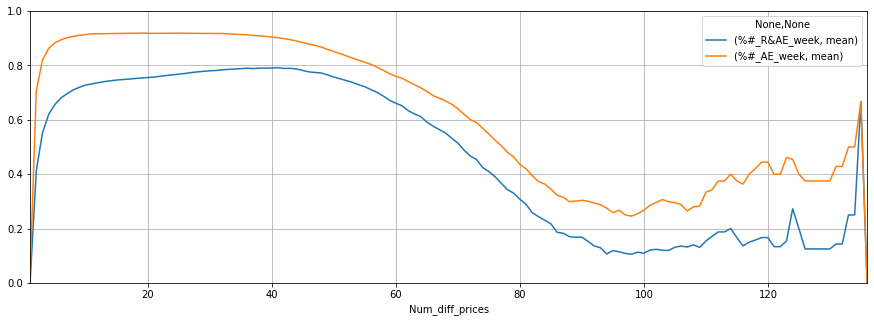

In [23]:
adeq_week_prices[[('%#_R&AE_week', 'mean'), ('%#_AE_week', 'mean'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', ylim=[0, 1], grid=True)

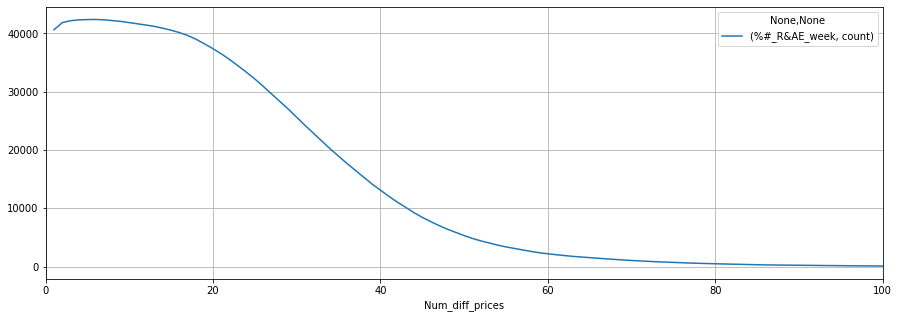

In [24]:
adeq_week_prices[[('%#_R&AE_week', 'count'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', xlim=[0.0, 100], grid=True)

## Зависимость свойств PED модели от SampleSize

In [25]:
adeq_day = sample_data_day.groupby(['SampleSize']).mean()

adeq_day.reset_index(inplace=True)

adeq_day.rename(columns={'flag_AE' : '%#_AE_day', 
                         'flag_R&AE' : '%#_R&AE_day'}, inplace=True)
adeq_day['%QTY_AE_day'] = adeq_day['QTY_AE_day'] / adeq_day['Qty']
adeq_day['%QTY_R&AE_day'] = adeq_day['QTY_R&AE_day'] / adeq_day['Qty']

columns_drop = ['SKU', 'Store', 'Coefficient', 'R-squared', 'T-test-p-value', 'QTY_AE_day', 'QTY_R&AE_day', 'Num_diff_prices']
adeq_day.drop(columns_drop, axis=1, inplace=True)

In [26]:
adeq_day

,SampleSize,Elasticity,Qty,%#_AE_day,%#_R&AE_day,%QTY_AE_day,%QTY_R&AE_day
0,10,-1.034580,7.493072,0.748694,0.070585,0.755353,0.141821
1,20,-0.875538,12.981485,0.816174,0.129761,0.842397,0.288557
2,30,-0.814516,18.512131,0.836803,0.185296,0.869562,0.395684
3,40,-0.780677,24.133747,0.851904,0.230543,0.882886,0.471269
4,50,-0.767812,29.432954,0.864644,0.273109,0.891046,0.525695
5,60,-0.754994,34.735628,0.870962,0.310275,0.897882,0.567389
6,70,-0.752271,40.188847,0.878105,0.345330,0.901549,0.611652
7,80,-0.740421,45.416561,0.881204,0.372958,0.905265,0.639379
8,90,-0.734042,51.288334,0.883496,0.395978,0.909012,0.662791
9,100,-0.729722,56.655383,0.886729,0.420759,0.909662,0.684774


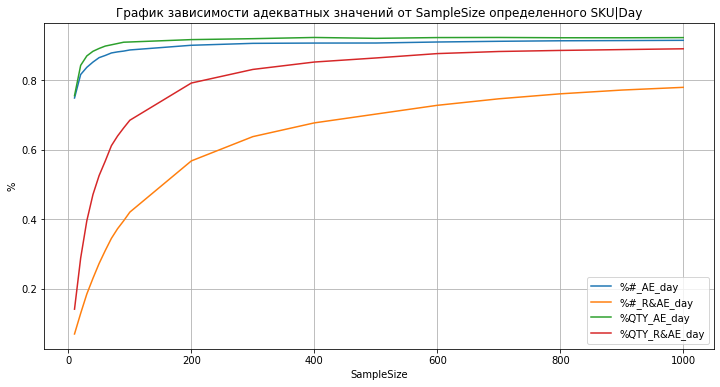

In [27]:
ae_stats_day = ['%#_AE_day', '%#_R&AE_day', '%QTY_AE_day', '%QTY_R&AE_day']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize определенного SKU|Day')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats_day:
    ax.plot(adeq_day.SampleSize, adeq_day[ae_stat], label=ae_stat)
    ax.legend()

In [28]:
adeq_week = sample_data_week.groupby(['SampleSize']).mean()

adeq_week.reset_index(inplace=True)

adeq_week.rename(columns={'flag_AE' : '%#_AE_week', 
                          'flag_R&AE' : '%#_R&AE_week'}, inplace=True)
adeq_week['%QTY_AE_week'] = adeq_week['QTY_AE_week'] / adeq_week['Qty']
adeq_week['%QTY_R&AE_week'] = adeq_week['QTY_R&AE_week'] / adeq_week['Qty']

columns_drop = ['SKU', 'Store', 'Coefficient', 'R-squared', 'T-test-p-value', 'QTY_AE_week', 'QTY_R&AE_week']
adeq_week.drop(columns_drop, axis=1, inplace=True)

In [29]:
adeq_week

,SampleSize,Elasticity,Qty,Num_diff_prices,%#_AE_week,%#_R&AE_week,%QTY_AE_week,%QTY_R&AE_week
0,10,-0.598001,4.639253,6.868626,0.790766,0.125459,0.806412,0.235499
1,20,-0.638901,9.410725,11.008521,0.854653,0.306861,0.872792,0.510197
2,30,-0.666478,14.862678,13.780793,0.876708,0.405140,0.896751,0.630099
3,40,-0.702081,19.337951,16.263825,0.894037,0.523320,0.910327,0.733667
4,50,-0.722792,24.277346,18.489057,0.900137,0.585224,0.912415,0.773324
5,60,-0.712341,29.056739,20.421141,0.903453,0.616831,0.911409,0.790754
6,70,-0.708441,34.238657,22.525348,0.906756,0.650569,0.915834,0.815954
7,80,-0.700099,39.049385,24.178607,0.908640,0.670991,0.918785,0.827995
8,90,-0.702722,43.651285,25.763272,0.911218,0.688923,0.918502,0.834333
9,100,-0.702059,48.575394,27.197267,0.912256,0.704229,0.918901,0.841086


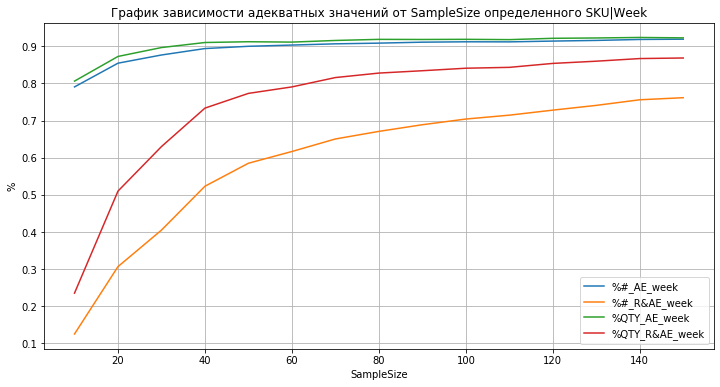

In [30]:
ae_stats_week = ['%#_AE_week', '%#_R&AE_week', '%QTY_AE_week', '%QTY_R&AE_week']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize определенного SKU|Week')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats_week:
    ax.plot(adeq_week.SampleSize, adeq_week[ae_stat], label=ae_stat)
    ax.legend()

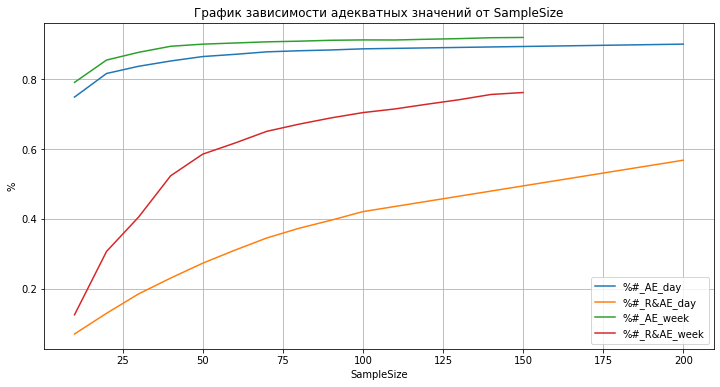

In [31]:
ae_stats_day = ['%#_AE_day', '%#_R&AE_day']
ae_stats_week = ['%#_AE_week', '%#_R&AE_week']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats_day:
    ax.plot(adeq_day[:11].SampleSize, adeq_day[:11][ae_stat], label=ae_stat)
    ax.legend()

for ae_stat in ae_stats_week:
    ax.plot(adeq_week.SampleSize, adeq_week[ae_stat], label=ae_stat)
    ax.legend()